# Cincinnati Traffic

## Topic
*What problem are you (or your stakeholder) trying to address?* 
THe issue that I will be focusing on is that of Cincinnati roads. It would seem that most says this city has a new unique arangement of road closures due to traffic collisions. If Cincinnati we looking to improve their road conditions and safety, it would be important to know where the majority of traffic collisions occur. It would also be important to know the severtiy of the accidents in these locations to know where the more serious problems are located. This project could even determine which areas are unsafe to travel depending on weather conditions. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*

Where in Cincinnati are the majority of fatal accidents, and what commonalities do the collisions share?

## What would an answer look like?
*What is your hypothesized answer to your question?*

I predict that the majority of wrecks will be in high trafficed areas of high speeds. Sharp bends will also have an effect on the situations. It will also be important to note the variation between weather conditions.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
*How will you use this data to answer your project question?*



 To prepare for this project, it will be necessary to collect data from reliable resources. All of the City of Cincinnati's information is collected and published online for all to access. The information collected will provide a map of the the area with ranking of dangerous roads to safe. 

 Data Sources:

 https://data.cincinnati-oh.gov/resource/rvmt-pkmq.json

 https://data.cincinnati-oh.gov/safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq


In [1]:
#Importing and setting environment

In [2]:
import sys
assert sys.version_info >= (3, 10)

import numpy as np
import pandas as pd
import os
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

import plotly.express as px



In [3]:
#Importing data (Merged in Excel)

In [4]:
traffic=pd.read_csv("datasets/traffic_crash_reports.csv")

In [5]:
#Analyzing Data

In [6]:
traffic.describe()

LATITUDE_X    LONGITUDE_X            AGE
count  105183.000000  105183.000000  105183.000000
mean       39.139677     -84.513909      37.658139
std         0.031165       0.048852      16.423981
min        39.054609     -84.756898       0.000000
25%        39.114384     -84.542479      24.000000
50%        39.135026     -84.513206      34.000000
75%        39.161079     -84.486142      50.000000
max        39.308208     -84.251150     123.000000

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105183 entries, 0 to 105182
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   LATITUDE_X                      105183 non-null  float64
 1   LONGITUDE_X                     105183 non-null  float64
 2   AGE                             105183 non-null  int64  
 3   COMMUNITY_COUNCIL_NEIGHBORHOOD  103565 non-null  object 
 4   CRASHDATE                       105183 non-null  object 
 5   CRASHLOCATION                   105183 non-null  object 
 6   DAYOFWEEK                       105183 non-null  object 
 7   GENDER                          105183 non-null  object 
 8   INJURIES                        105183 non-null  object 
 9   LIGHTCONDITIONSPRIMARY          105183 non-null  object 
 10  MANNEROFCRASH                   105183 non-null  object 
 11  ROADCONTOUR                     105183 non-null  object 
 12  ROADCLASSDESC   

In [8]:
traffic.isnull().sum()

LATITUDE_X                           0
LONGITUDE_X                          0
AGE                                  0
COMMUNITY_COUNCIL_NEIGHBORHOOD    1618
CRASHDATE                            0
CRASHLOCATION                        0
DAYOFWEEK                            0
GENDER                               0
INJURIES                             0
LIGHTCONDITIONSPRIMARY               0
MANNEROFCRASH                        0
ROADCONTOUR                          0
ROADCLASSDESC                        0
UNITTYPE                             0
TYPEOFPERSON                         0
WEATHER                              0
dtype: int64

In [9]:
#Creating sample data to modify

In [10]:
trafficCrashSample=traffic.copy(deep=True)
trafficCrashSample.sample(5)

LATITUDE_X  LONGITUDE_X  AGE COMMUNITY_COUNCIL_NEIGHBORHOOD  \
86223    39.207511   -84.466026   31                       HARTWELL   
19269    39.127465   -84.548521   55                SOUTH FAIRMOUNT   
2194     39.185731   -84.465316   24                      BOND HILL   
102852   39.204703   -84.468525   25                       HARTWELL   
38294    39.183324   -84.425136   51                 PLEASANT RIDGE   

              CRASHDATE               CRASHLOCATION DAYOFWEEK      GENDER  \
86223   12/16/2013 1:05         03 - T-INTERSECTION       MON    M - MALE   
19269   3/19/2018 10:43  02 - FOUR-WAY INTERSECTION       MON  F - FEMALE   
2194    11/7/2018 15:50    01 - NOT AN INTERSECTION       WED  F - FEMALE   
102852   3/13/2013 7:51    01 - NOT AN INTERSECTION       WED  F - FEMALE   
38294   9/22/2016 18:00    01 - NOT AN INTERSECTION       THU    M - MALE   

                             INJURIES      LIGHTCONDITIONSPRIMARY  \
86223                    2 - POSSIBLE  4 - DARK - LIGHTED ROADWAY   
19269   1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
2194    1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
102852  1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
38294   1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   

                            MANNEROFCRASH         ROADCONTOUR  \
86223   8 - SIDESWIPE, OPPOSITE DIRECTION  1 - STRAIGHT LEVEL   
19269                           6 - ANGLE  2 - STRAIGHT GRADE   
2194        7 - SIDESWIPE, SAME DIRECTION  2 - STRAIGHT GRADE   
102852                          6 - ANGLE     4 - CURVE GRADE   
38294       7 - SIDESWIPE, SAME DIRECTION  1 - STRAIGHT LEVEL   

               ROADCLASSDESC                    UNITTYPE  TYPEOFPERSON  \
86223   Minor Arterial Roads  06 - SPORT UTILITY VEHICLE    D - DRIVER   
19269    Local Streets/Roads               03 - MID SIZE    D - DRIVER   
2194    Major Arterial Roads  06 - SPORT UTILITY VEHICLE  O - OCCUPANT   
102852   Interstate Highways                02 - COMPACT    D - DRIVER   
38294   Major Arterial Roads                02 - COMPACT    D - DRIVER   

          WEATHER  
86223    6 - SNOW  
19269   1 - CLEAR  
2194    1 - CLEAR  
102852   6 - SNOW  
38294   1 - CLEAR

In [11]:
#First Change: Separating a Rounded Time from the date

In [12]:
trafficCrashSample['CRASHDATE'] = pd.to_datetime(trafficCrashSample['CRASHDATE'], format='%m/%d/%Y %H:%M')

trafficCrashSample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105183 entries, 0 to 105182
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   LATITUDE_X                      105183 non-null  float64       
 1   LONGITUDE_X                     105183 non-null  float64       
 2   AGE                             105183 non-null  int64         
 3   COMMUNITY_COUNCIL_NEIGHBORHOOD  103565 non-null  object        
 4   CRASHDATE                       105183 non-null  datetime64[ns]
 5   CRASHLOCATION                   105183 non-null  object        
 6   DAYOFWEEK                       105183 non-null  object        
 7   GENDER                          105183 non-null  object        
 8   INJURIES                        105183 non-null  object        
 9   LIGHTCONDITIONSPRIMARY          105183 non-null  object        
 10  MANNEROFCRASH                   105183 non-null  object 

In [13]:
#Rounding times to hours

In [14]:
trafficCrashSample["CRASHDATE"] = trafficCrashSample["CRASHDATE"].dt.round("H")

In [15]:
trafficCrashSample.head()

LATITUDE_X  LONGITUDE_X  AGE COMMUNITY_COUNCIL_NEIGHBORHOOD  \
0   39.127905   -84.533095   21                            CUF   
1   39.116582   -84.529443   48                       WEST END   
2   39.118817   -84.499983   22                   WALNUT HILLS   
3   39.117377   -84.499663   34                   WALNUT HILLS   
4   39.085691   -84.391435   49               MOUNT WASHINGTON   

            CRASHDATE               CRASHLOCATION DAYOFWEEK      GENDER  \
0 2018-12-27 17:00:00    01 - NOT AN INTERSECTION       THU    M - MALE   
1 2018-12-27 15:00:00    01 - NOT AN INTERSECTION       THU    M - MALE   
2 2018-12-26 17:00:00    01 - NOT AN INTERSECTION       WED  F - FEMALE   
3 2018-12-26 17:00:00    01 - NOT AN INTERSECTION       WED  F - FEMALE   
4 2018-12-27 16:00:00  02 - FOUR-WAY INTERSECTION       THU    M - MALE   

                        INJURIES LIGHTCONDITIONSPRIMARY  \
0  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
1  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
2  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
3  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
4  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   

                                       MANNEROFCRASH         ROADCONTOUR  \
0  1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...  1 - STRAIGHT LEVEL   
1                      7 - SIDESWIPE, SAME DIRECTION  1 - STRAIGHT LEVEL   
2                                       2 - REAR-END  1 - STRAIGHT LEVEL   
3                                       2 - REAR-END  1 - STRAIGHT LEVEL   
4                                       2 - REAR-END  1 - STRAIGHT LEVEL   

          ROADCLASSDESC          UNITTYPE TYPEOFPERSON     WEATHER  
0  Major Arterial Roads     03 - MID SIZE   D - DRIVER    4 - RAIN  
1   Local Streets/Roads     03 - MID SIZE   D - DRIVER    4 - RAIN  
2                 Ramps     03 - MID SIZE   D - DRIVER   1 - CLEAR  
3                 Ramps  01 - SUB-COMPACT   D - DRIVER   1 - CLEAR  
4   Local Streets/Roads      02 - COMPACT   D - DRIVER  2 - CLOUDY

In [16]:
#Converting back to string to separate by 'space' delimiter

In [17]:
trafficCrashSample['CRASHDATE'] = trafficCrashSample['CRASHDATE'].dt.strftime('%m/%d/%Y %H:%M')

trafficCrashSample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105183 entries, 0 to 105182
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   LATITUDE_X                      105183 non-null  float64
 1   LONGITUDE_X                     105183 non-null  float64
 2   AGE                             105183 non-null  int64  
 3   COMMUNITY_COUNCIL_NEIGHBORHOOD  103565 non-null  object 
 4   CRASHDATE                       105183 non-null  object 
 5   CRASHLOCATION                   105183 non-null  object 
 6   DAYOFWEEK                       105183 non-null  object 
 7   GENDER                          105183 non-null  object 
 8   INJURIES                        105183 non-null  object 
 9   LIGHTCONDITIONSPRIMARY          105183 non-null  object 
 10  MANNEROFCRASH                   105183 non-null  object 
 11  ROADCONTOUR                     105183 non-null  object 
 12  ROADCLASSDESC   

In [18]:
#Reference point of column list before change

In [19]:
list(trafficCrashSample.columns)

['LATITUDE_X',
 'LONGITUDE_X',
 'AGE',
 'COMMUNITY_COUNCIL_NEIGHBORHOOD',
 'CRASHDATE',
 'CRASHLOCATION',
 'DAYOFWEEK',
 'GENDER',
 'INJURIES',
 'LIGHTCONDITIONSPRIMARY',
 'MANNEROFCRASH',
 'ROADCONTOUR',
 'ROADCLASSDESC',
 'UNITTYPE',
 'TYPEOFPERSON',
 'WEATHER']

In [20]:
#Separation of "CRASHDATE" to "DATE" and "TIME"

In [21]:
trafficCrashSample.dropna(inplace = True) 

new = trafficCrashSample["CRASHDATE"].str.split(" ", n = 1, expand = True)

trafficCrashSample["DATE"]= new[0]
trafficCrashSample["TIME"]= new[1]

trafficCrashSample.drop(columns =["CRASHDATE"], inplace = True)

list(trafficCrashSample.columns)

['LATITUDE_X',
 'LONGITUDE_X',
 'AGE',
 'COMMUNITY_COUNCIL_NEIGHBORHOOD',
 'CRASHLOCATION',
 'DAYOFWEEK',
 'GENDER',
 'INJURIES',
 'LIGHTCONDITIONSPRIMARY',
 'MANNEROFCRASH',
 'ROADCONTOUR',
 'ROADCLASSDESC',
 'UNITTYPE',
 'TYPEOFPERSON',
 'WEATHER',
 'DATE',
 'TIME']

In [22]:
#Display of changed data

In [23]:
trafficCrashSample.sample(5)

LATITUDE_X  LONGITUDE_X  AGE COMMUNITY_COUNCIL_NEIGHBORHOOD  \
29327   39.181865   -84.427435   22                 PLEASANT RIDGE   
84931   39.142582   -84.469364   50                       EVANSTON   
16655   39.137597   -84.534355   52                CAMP WASHINGTON   
86059   39.186041   -84.524398   45    SPRING GROVE - WINTON HILLS   
49914   39.102447   -84.505803   49                       DOWNTOWN   

                    CRASHLOCATION DAYOFWEEK      GENDER  \
29327    01 - NOT AN INTERSECTION       THU    M - MALE   
84931    01 - NOT AN INTERSECTION       THU    M - MALE   
16655    01 - NOT AN INTERSECTION       TUE    M - MALE   
86059    01 - NOT AN INTERSECTION       WED  F - FEMALE   
49914  02 - FOUR-WAY INTERSECTION       MON  F - FEMALE   

                            INJURIES      LIGHTCONDITIONSPRIMARY  \
29327  1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
84931  1 - NO INJURY / NONE REPORTED  4 - DARK - LIGHTED ROADWAY   
16655  1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
86059  1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
49914         3 - NON-INCAPACITATING  4 - DARK - LIGHTED ROADWAY   

                           MANNEROFCRASH         ROADCONTOUR  \
29327                       2 - REAR-END  1 - STRAIGHT LEVEL   
84931  8 - SIDESWIPE, OPPOSITE DIRECTION  1 - STRAIGHT LEVEL   
16655      7 - SIDESWIPE, SAME DIRECTION  1 - STRAIGHT LEVEL   
86059                          6 - ANGLE     4 - CURVE GRADE   
49914                          6 - ANGLE  1 - STRAIGHT LEVEL   

              ROADCLASSDESC                    UNITTYPE TYPEOFPERSON  \
29327  Major Arterial Roads               03 - MID SIZE   D - DRIVER   
84931       Collector Roads                 07 - PICKUP   D - DRIVER   
16655   Interstate Highways   17 - TRACTOR/SEMI-TRAILER   D - DRIVER   
86059  Major Arterial Roads  06 - SPORT UTILITY VEHICLE   D - DRIVER   
49914  Minor Arterial Roads  06 - SPORT UTILITY VEHICLE   D - DRIVER   

          WEATHER        DATE   TIME  
29327   1 - CLEAR  04/13/2017  15:00  
84931    4 - RAIN  10/16/2014  07:00  
16655    4 - RAIN  11/07/2017  11:00  
86059  2 - CLOUDY  03/19/2014  18:00  
49914   1 - CLEAR  08/01/2016  06:00

In [24]:
#Custom Day of the Week

In [25]:
trafficCrashSample['DATE'].dtypes

dtype('O')

In [26]:
trafficCrashSample['DATE'] = pd.to_datetime(trafficCrashSample['DATE'])

Text(0.5, 1.0, 'Total crashes for each day of the week')

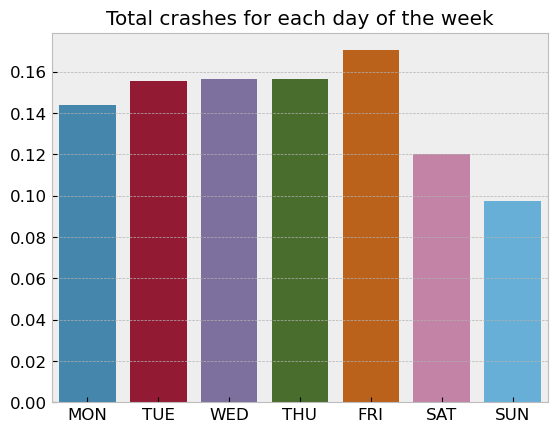

In [27]:
count = trafficCrashSample['DATE'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['MON','TUE','WED','THU','FRI','SAT','SUN']
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index, y=count.values, ax=ax)
ax.set_title('Total crashes for each day of the week')

In [28]:
#Road Location

<AxesSubplot:>

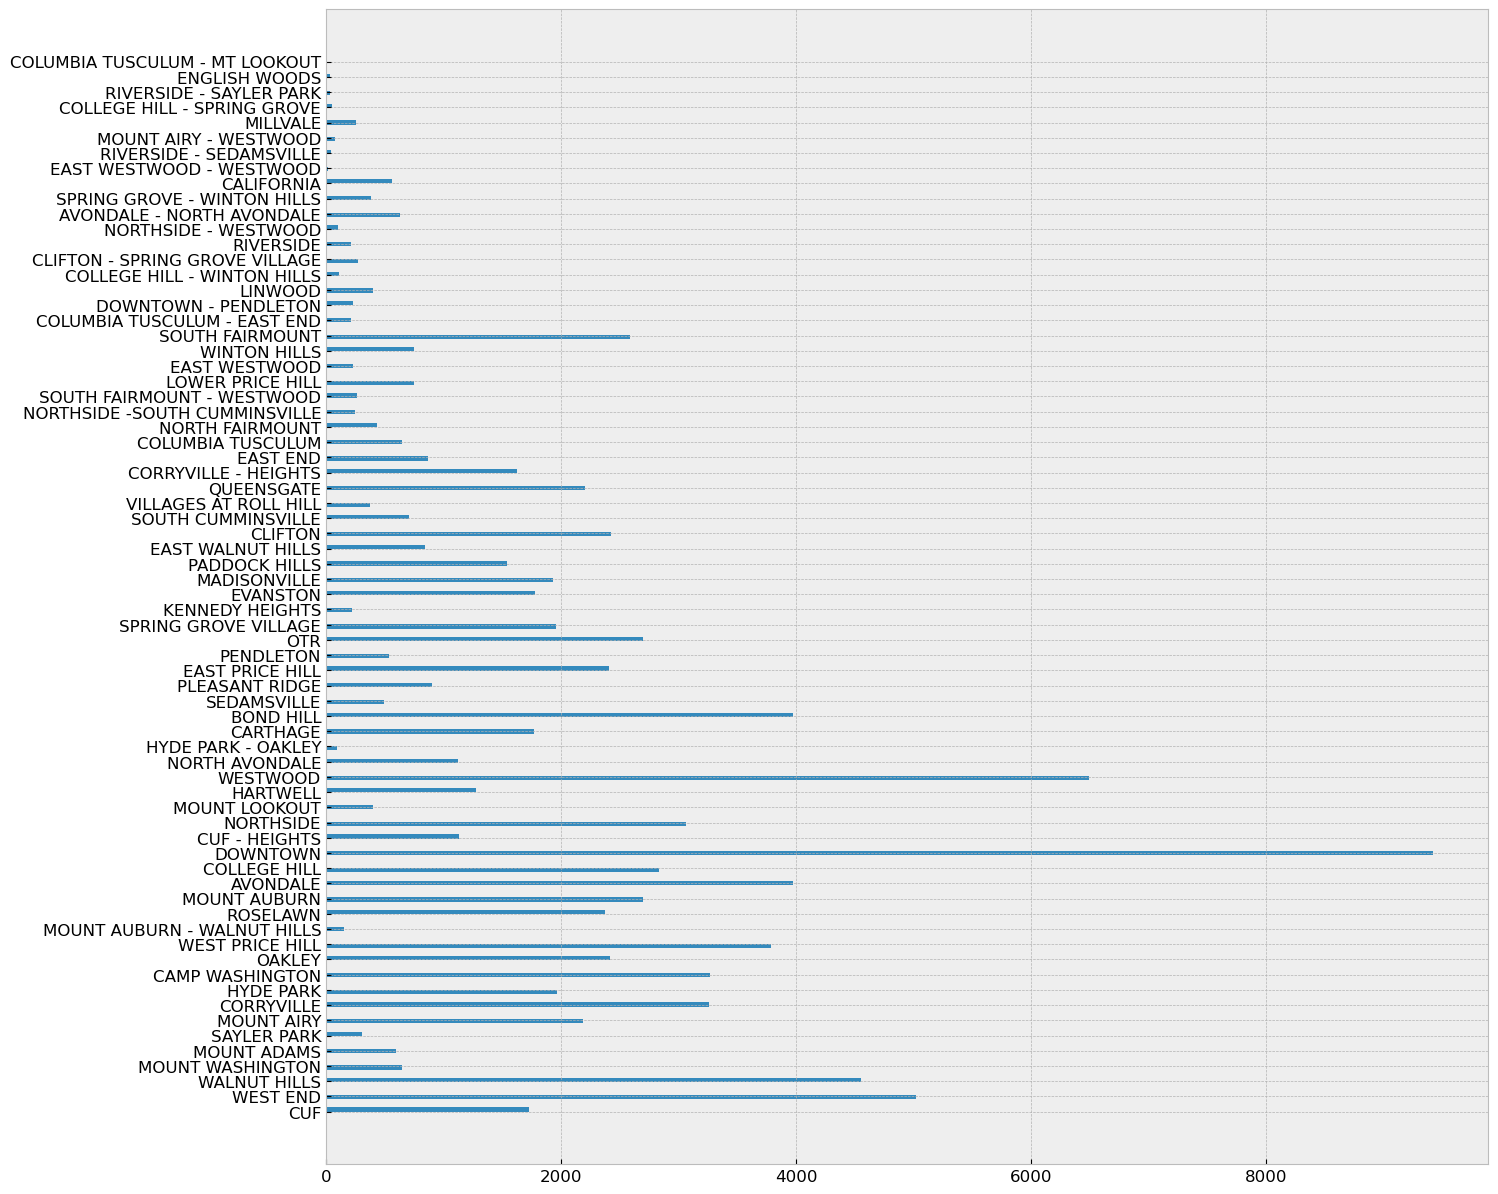

In [29]:
trafficCrashSample['COMMUNITY_COUNCIL_NEIGHBORHOOD'].hist(bins = 250, figsize = (15,15),orientation='horizontal', align='mid')

In [30]:
#Road Classification

<AxesSubplot:>

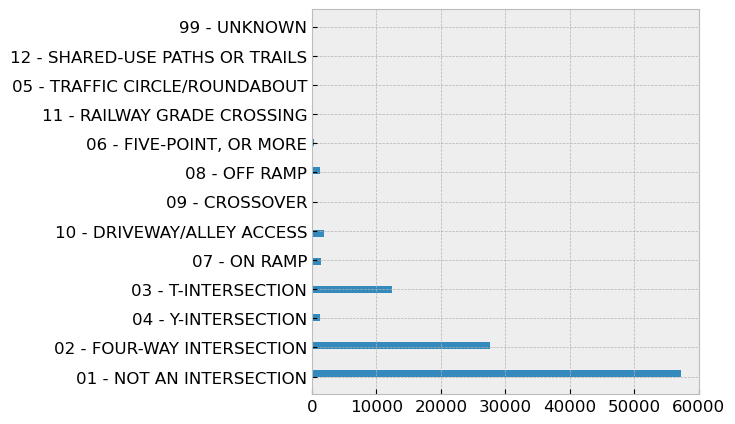

In [31]:
trafficCrashSample['CRASHLOCATION'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

<AxesSubplot:>

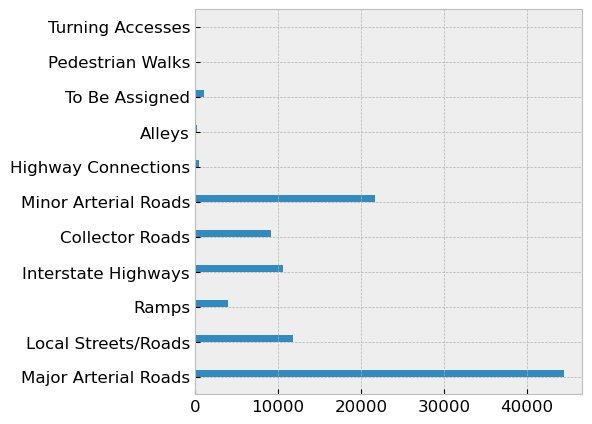

In [32]:
trafficCrashSample['ROADCLASSDESC'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

<AxesSubplot:>

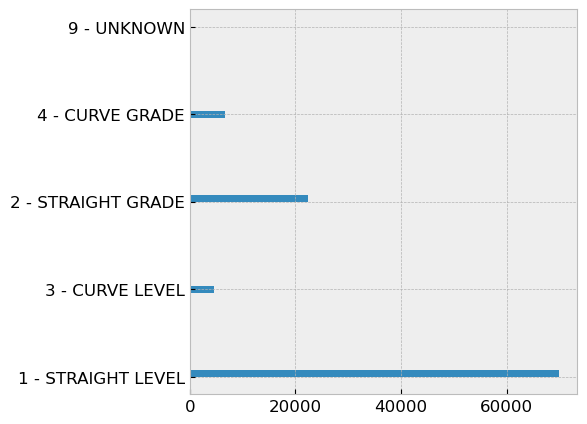

In [33]:
trafficCrashSample['ROADCONTOUR'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

In [34]:
#Driver Profile

<AxesSubplot:>

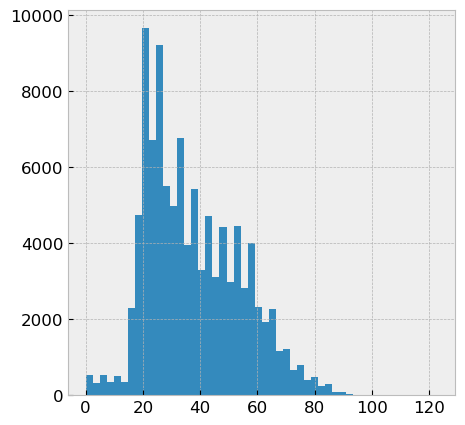

In [35]:
trafficCrashSample['AGE'].hist(bins = 50, figsize = (5,5))

<AxesSubplot:>

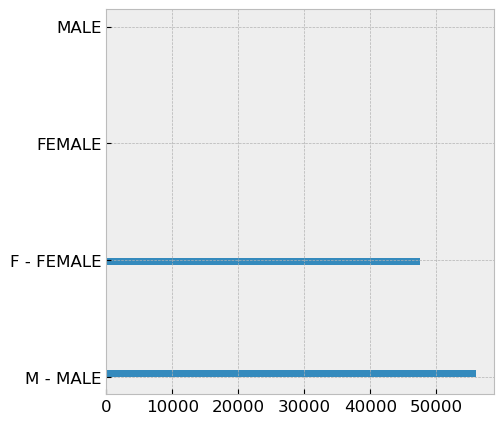

In [36]:
trafficCrashSample['GENDER'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

<AxesSubplot:>

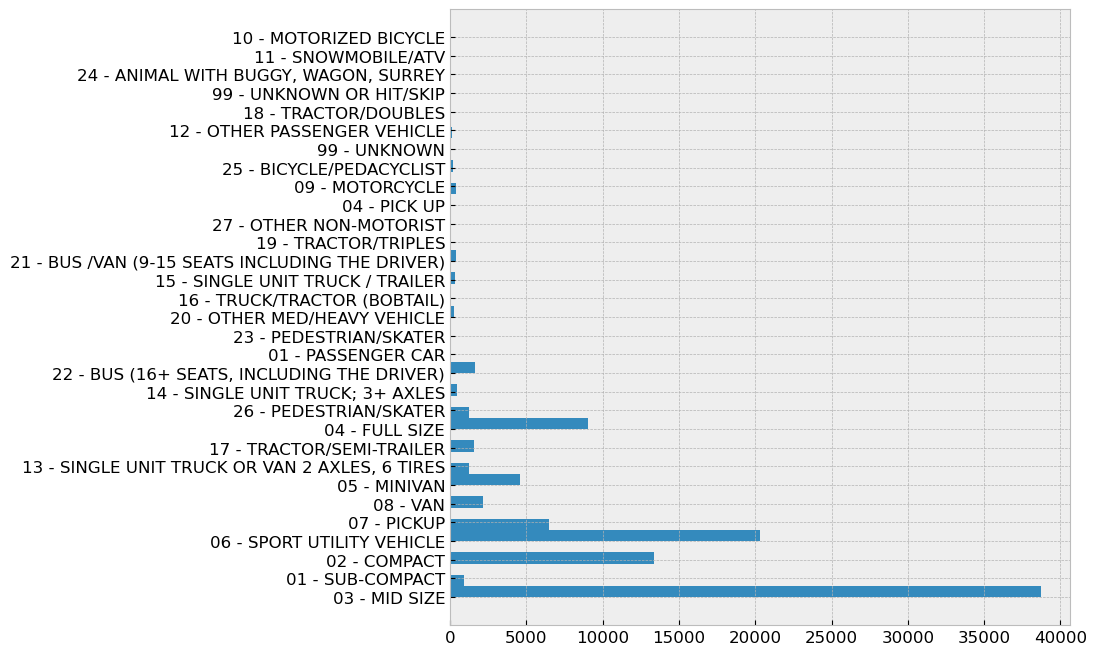

In [37]:
trafficCrashSample['UNITTYPE'].hist(bins = 50, figsize = (8,8),orientation='horizontal')

In [38]:
#Atmosphere Conditions

<AxesSubplot:>

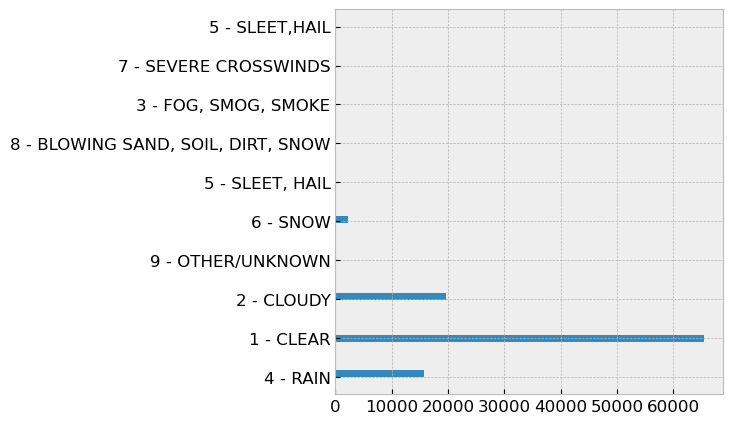

In [39]:
trafficCrashSample['WEATHER'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

<AxesSubplot:>

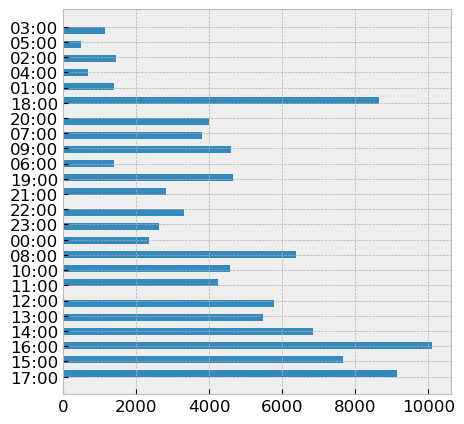

In [40]:
trafficCrashSample['TIME'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

In [ ]:
#Situation

<AxesSubplot:>

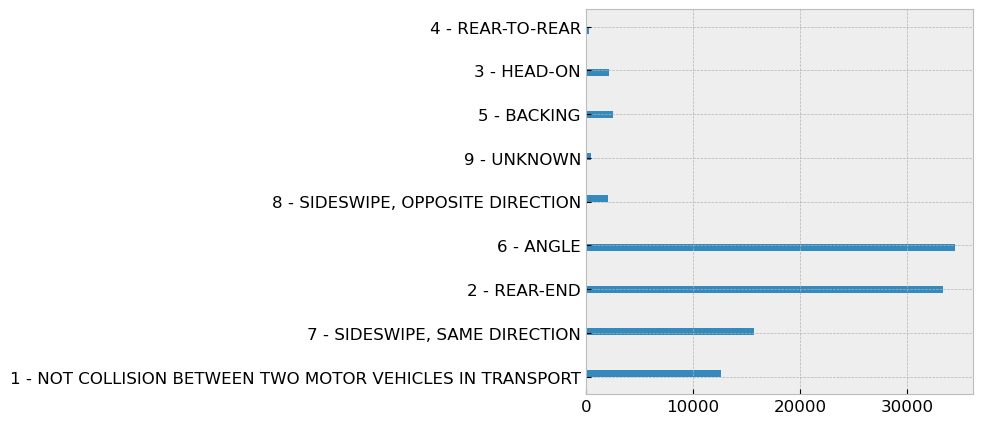

In [46]:
trafficCrashSample['MANNEROFCRASH'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

<AxesSubplot:>

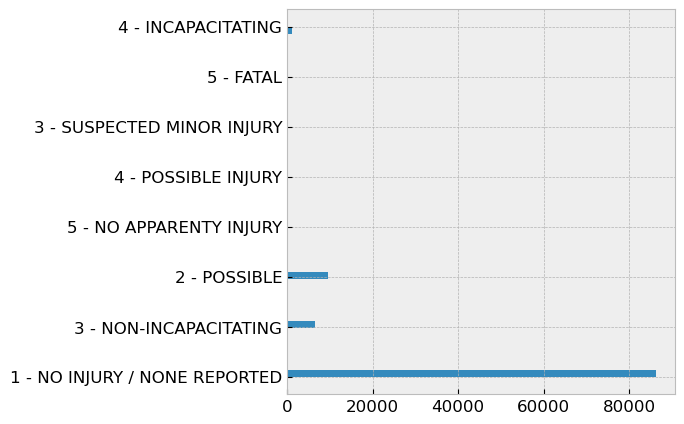

In [47]:
trafficCrashSample['INJURIES'].hist(bins = 50, figsize = (5,5),orientation='horizontal')

In [41]:
#Maps

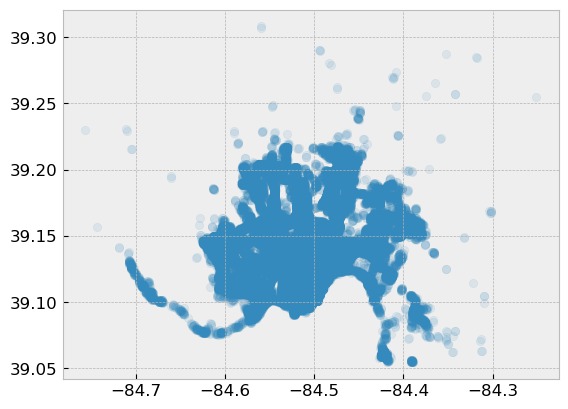

In [42]:
longitude_df=traffic['LONGITUDE_X']
latitude_df=traffic['LATITUDE_X']

plt.scatter(longitude_df, latitude_df, alpha=0.1)
plt.show()

In [45]:
fig = px.scatter_mapbox(traffic, 
                        lat="LATITUDE_X", 
                        lon="LONGITUDE_X",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()